In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip household_power_consumption.zip



--2025-09-08 17:30:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘household_power_consumption.zip’

household_power_con     [    <=>             ]  19.68M  28.5MB/s    in 0.7s    

2025-09-08 17:30:58 (28.5 MB/s) - ‘household_power_consumption.zip’ saved [20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


In [2]:
import pandas as pd
data = pd.read_csv("household_power_consumption.txt", sep=";", low_memory=False)
print(data.head())


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  


In [3]:
import numpy as np
data.replace("?", np.nan, inplace=True)
data.dropna(inplace=True)

cols = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]
for col in cols:
    data[col] = pd.to_numeric(data[col], errors="coerce")


In [4]:
data['DateTime'] = pd.to_datetime(data['Date'] + " " + data['Time'], format="%d/%m/%Y %H:%M:%S", errors='coerce')
data.sort_values('DateTime', inplace=True)


In [5]:
data['Energy_kWh'] = data['Global_active_power'] * (1/60)


In [6]:
data['Hour'] = data['DateTime'].dt.hour
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['Month'] = data['DateTime'].dt.month


In [7]:
data['Carbon_Emission_kg'] = data['Energy_kWh'] * 0.42


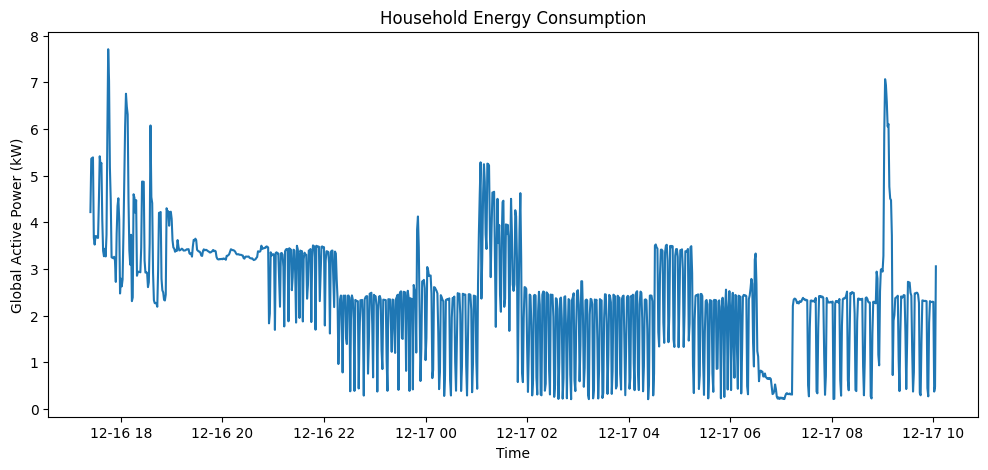

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(data['DateTime'][:1000], data['Global_active_power'][:1000])
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.title("Household Energy Consumption")
plt.show()


In [9]:
X = data[['Hour','DayOfWeek','Month','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']]
y = data['Global_active_power']


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 0.04447899126471546
R2 Score: 0.9982397863453384


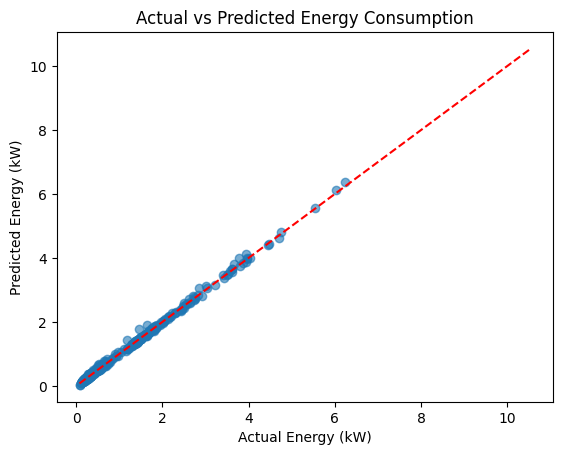

In [13]:
plt.scatter(y_test[:500], y_pred[:500], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Energy (kW)")
plt.ylabel("Predicted Energy (kW)")
plt.title("Actual vs Predicted Energy Consumption")
plt.show()


In [14]:
import joblib
joblib.dump(lr, "linear_regression_energy_model.pkl")


['linear_regression_energy_model.pkl']